## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,7
import warnings
warnings.filterwarnings('ignore')

## Reading dataset

In [2]:
df = pd.read_csv('cov_confirmed1.csv')
#parse strings to datetime type
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)
df = df.set_index('Date')
df.head()

,Confirmed
Date,
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,1.0
2020-02-03,1.0
2020-02-04,0.0


In [3]:
df.tail()

,Confirmed
Date,
2021-05-08,41971.0
2021-05-09,35801.0
2021-05-10,27487.0
2021-05-11,37290.0
2021-05-12,43529.0


In [4]:
df.shape

(468, 1)

In [5]:
df.columns

Index(['Confirmed'], dtype='object')

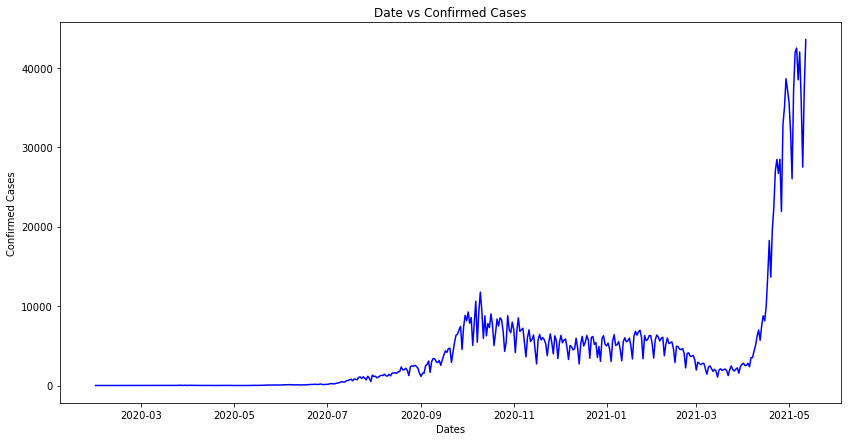

In [6]:
#plot graph

plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('Date vs Confirmed Cases')
plt.plot(df, color='b')

## Rolling statistics

In [7]:
# Determining rolling statistics

rolmean = df.rolling(window=3).mean()
rolstd = df.rolling(window=3).std()
print(rolmean,rolstd)

               Confirmed
Date                    
2020-01-31           NaN
2020-02-01           NaN
2020-02-02      0.333333
2020-02-03      0.666667
2020-02-04      0.666667
...                  ...
2021-05-08  40965.000000
2021-05-09  38744.000000
2021-05-10  35086.333333
2021-05-11  33526.000000
2021-05-12  36102.000000

[468 rows x 1 columns]               Confirmed
Date                   
2020-01-31          NaN
2020-02-01          NaN
2020-02-02     0.577350
2020-02-03     0.577350
2020-02-04     0.577350
...                 ...
2021-05-08  2183.353155
2021-05-09  3094.788684
2021-05-10  7268.399090
2021-05-11  5282.652837
2021-05-12  8086.714351

[468 rows x 1 columns]


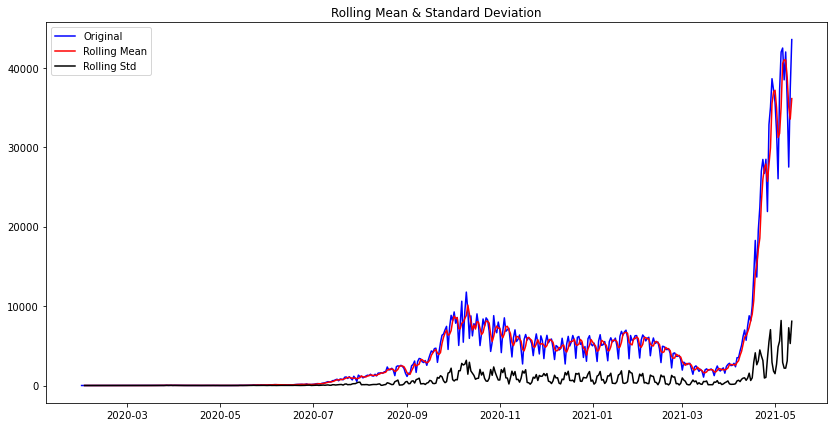

In [8]:
# plotting rolling statistics

org = plt.plot(df, color='b', label='Original')
mean = plt.plot(rolmean, color='r', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## Dickey-Fuller Test

In [9]:
# perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')

dftest = adfuller(df.Confirmed, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p value','#Lags used', 'No:of observations found'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test
Test Statistic               -1.103536
p value                       0.713660
#Lags used                   15.000000
No:of observations found    452.000000
Critical Value (1%)          -3.444900
Critical Value (5%)          -2.867956
Critical Value (10%)         -2.570187
dtype: float64


In [10]:
# Wrapping visual and statistical tools in a single function

def test_stationarity(timeseries):
    
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()
    
    # Plot rolling statistics
    org = plt.plot(timeseries, color='b', label='Original')
    mean = plt.plot(rolmean, color='r', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries.Confirmed, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p value','#Lags used', 'No:of observations found'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value    
    print(dfoutput)

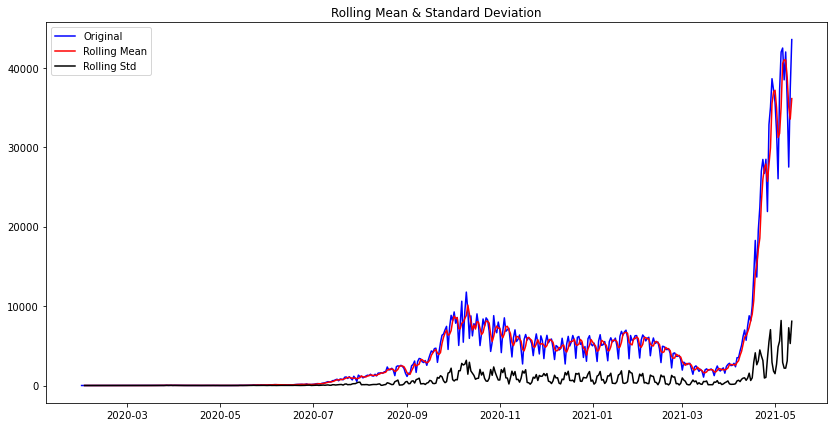

Results of Dickey-Fuller Test
Test Statistic               -1.103536
p value                       0.713660
#Lags used                   15.000000
No:of observations found    452.000000
Critical Value (1%)          -3.444900
Critical Value (5%)          -2.867956
Critical Value (10%)         -2.570187
dtype: float64


In [11]:
test_stationarity(df)

- Since Test statistic > Critical value(5%), data is not stationary

## Converting non stationary data to stationary data

#### Differencing simple moving average

In [12]:
movingAverage = df.rolling(window=3).mean()
df_minus_movingAverage = df - movingAverage
df_minus_movingAverage.head(14)

,Confirmed
Date,
2020-01-31,NaN
2020-02-01,NaN
2020-02-02,0.666667
2020-02-03,0.333333
2020-02-04,-0.666667
2020-02-05,-0.333333
2020-02-06,0.000000
2020-02-07,0.000000
2020-02-08,0.000000


In [13]:
# removing nan values
df_minus_movingAverage.dropna(inplace=True)
df_minus_movingAverage.head()

,Confirmed
Date,
2020-02-02,0.666667
2020-02-03,0.333333
2020-02-04,-0.666667
2020-02-05,-0.333333
2020-02-06,0.000000


In [14]:
# dropping nan values
movingAverage.dropna(inplace=True)
movingAverage

,Confirmed
Date,
2020-02-02,0.333333
2020-02-03,0.666667
2020-02-04,0.666667
2020-02-05,0.333333
2020-02-06,0.000000
...,...
2021-05-08,40965.000000
2021-05-09,38744.000000
2021-05-10,35086.333333


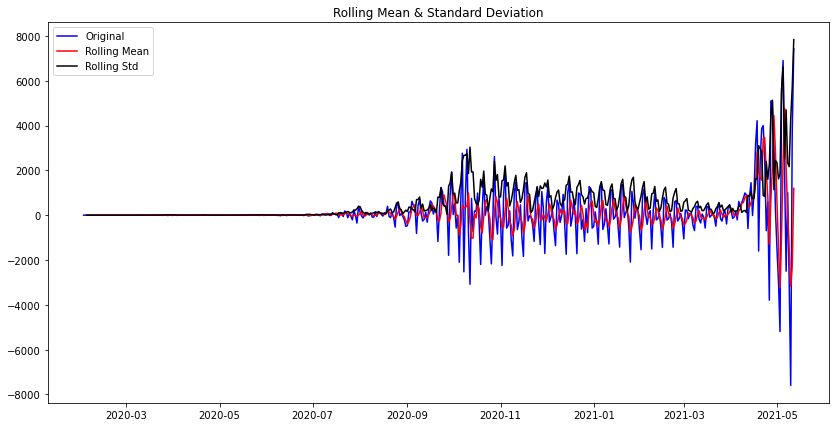

Results of Dickey-Fuller Test
Test Statistic               -3.866707
p value                       0.002294
#Lags used                   14.000000
No:of observations found    451.000000
Critical Value (1%)          -3.444933
Critical Value (5%)          -2.867970
Critical Value (10%)         -2.570195
dtype: float64


In [15]:
test_stationarity(df_minus_movingAverage)

- Now the test statistic < Critical Value (5%), the data is stationary

In [16]:
#checking lags

from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(df_minus_movingAverage)

{'bic':              0            1            2
 0  7891.444578  7850.120828  7803.257700
 1  7882.157634  7815.592682  7809.045136
 2  7816.001079  7815.066255  7813.301910
 3  7817.999700  7821.209057  7805.716187
 4  7806.588849  7808.042670  7675.359680,
 'bic_min_order': (4, 2)}

## ARIMA Model

Plotting ARIMA Model


/home/user/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


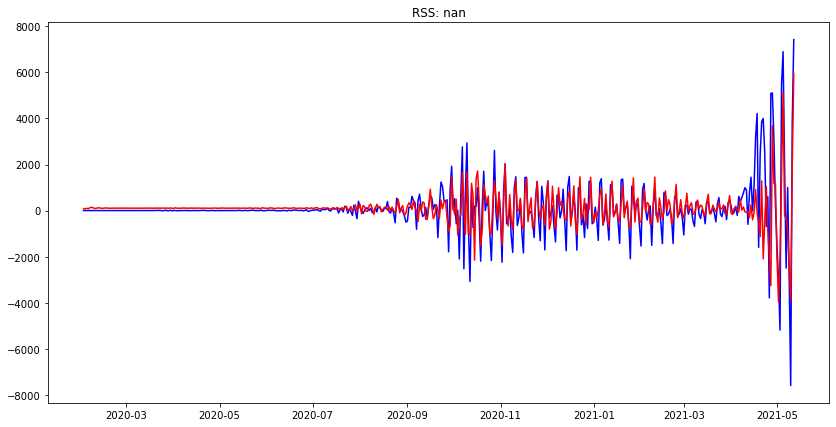

In [17]:
from statsmodels.tsa.arima_model import ARIMA
# ARIMA Model

print('Plotting ARIMA Model')
model = ARIMA(df_minus_movingAverage, order=(4,0,3))
results_ARIMA = model.fit(disp=1)
plt.plot(df_minus_movingAverage,color='b')
plt.plot(results_ARIMA.fittedvalues, color='r')
plt.title('RSS: {:1.4f}'.format(sum((results_ARIMA.fittedvalues-df['Confirmed'])**2)))
plt.show()

## Getting predictions

In [18]:
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
pred_ARIMA_diff

Date
2020-02-02      82.789961
2020-02-03      70.284805
2020-02-04      98.378424
2020-02-05      82.297264
2020-02-06     113.948733
                 ...     
2021-05-08    -936.867844
2021-05-09   -2366.364758
2021-05-10   -3883.637838
2021-05-11    1911.261971
2021-05-12    5950.355444
Length: 466, dtype: float64

In [19]:
#to dataframe

pred_ARIMA = pred_ARIMA_diff.to_frame()
pred_ARIMA.tail()

,0
Date,
2021-05-08,-936.867844
2021-05-09,-2366.364758
2021-05-10,-3883.637838
2021-05-11,1911.261971
2021-05-12,5950.355444


In [20]:
# converting back to orginal by adding moving averages

model_values = pred_ARIMA[0] + movingAverage['Confirmed']
model_values.tail()

Date
2021-05-08    40028.132156
2021-05-09    36377.635242
2021-05-10    31202.695495
2021-05-11    35437.261971
2021-05-12    42052.355444
dtype: float64

## Fitted Model Visualized

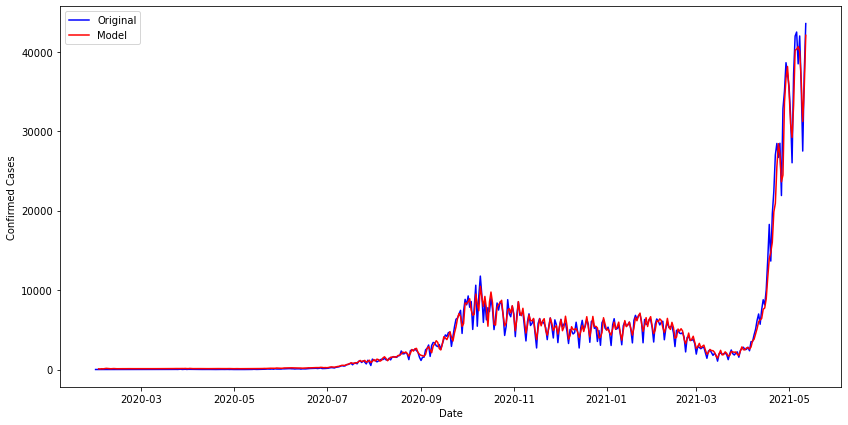

In [21]:
plt.plot(df, color='b', label='Original')
plt.plot(model_values, color='r', label='Model')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(loc='best')
plt.show(block=False)

## Forecast

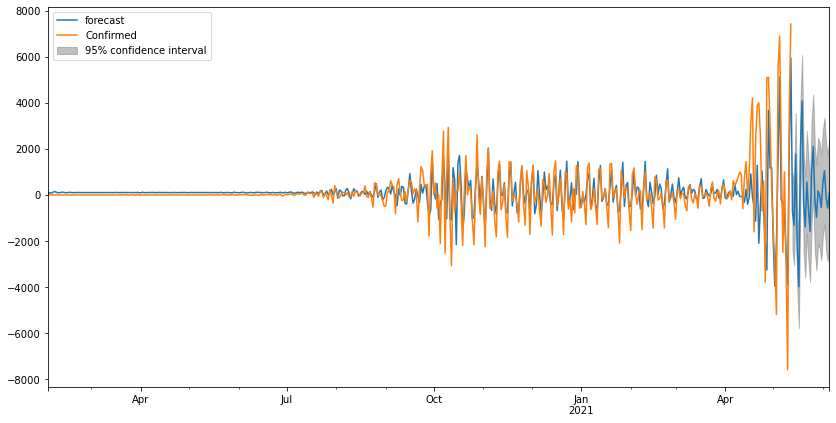

In [22]:
results_ARIMA.plot_predict(1, 489)
fc=results_ARIMA.forecast(steps=20)

In [23]:
forecast = fc[0]
forecast

array([ -714.38289899, -1322.67024401,  1779.89782854, -2282.06849134,
       -3978.35995844,  2076.24061236,  4079.82084587,  -351.49126795,
       -1385.05834432,   560.76223963,  -640.85636169, -1576.49127706,
        1062.2426209 ,  2113.41759738,  -181.10133689,  -979.63645525,
         178.61137581,   -17.77770255,  -541.28731328,   526.4863938 ])

In [24]:
new_df = df.tail(3)
new_df

,Confirmed
Date,
2021-05-10,27487.0
2021-05-11,37290.0
2021-05-12,43529.0


In [25]:
## converting forecasted values to orginal scale

for fc in forecast:
    s = new_df.iloc[-2:].sum()
    value = ((3*fc)+s)/2
    new_df = new_df.append(value, ignore_index=True)

new_df

,Confirmed
0,27487.000000
1,37290.000000
2,43529.000000
3,39337.925652
4,39449.457460
5,42063.538298
6,37333.395142
7,33730.926783
8,38646.521881
9,42308.455601


In [26]:
new_df['Confirmed']

0     27487.000000
1     37290.000000
2     43529.000000
3     39337.925652
4     39449.457460
5     42063.538298
6     37333.395142
7     33730.926783
8     38646.521881
9     42308.455601
10    39950.251839
11    39051.766203
12    40342.152380
13    38735.674749
14    37174.176649
15    39548.289631
16    41531.359536
17    40268.172578
18    39430.311374
19    40117.159040
20    39747.068653
21    39120.182877
22    40223.355356
Name: Confirmed, dtype: float64

In [27]:
date=pd.date_range('2021-05-13','2021-06-01')

In [28]:
forcast_df = pd.DataFrame({'Date':date, 'Confirmed':new_df['Confirmed'][3:23]})
forcast_df['Date']=pd.to_datetime(forcast_df['Date'], infer_datetime_format=True)
forcast_df

,Date,Confirmed
3,2021-05-13,39337.925652
4,2021-05-14,39449.457460
5,2021-05-15,42063.538298
6,2021-05-16,37333.395142
7,2021-05-17,33730.926783
8,2021-05-18,38646.521881
9,2021-05-19,42308.455601
10,2021-05-20,39950.251839
11,2021-05-21,39051.766203
12,2021-05-22,40342.152380


In [29]:
forcast_df = forcast_df.set_index('Date')

In [30]:
forcast_df

,Confirmed
Date,
2021-05-13,39337.925652
2021-05-14,39449.457460
2021-05-15,42063.538298
2021-05-16,37333.395142
2021-05-17,33730.926783
2021-05-18,38646.521881
2021-05-19,42308.455601
2021-05-20,39950.251839
2021-05-21,39051.766203


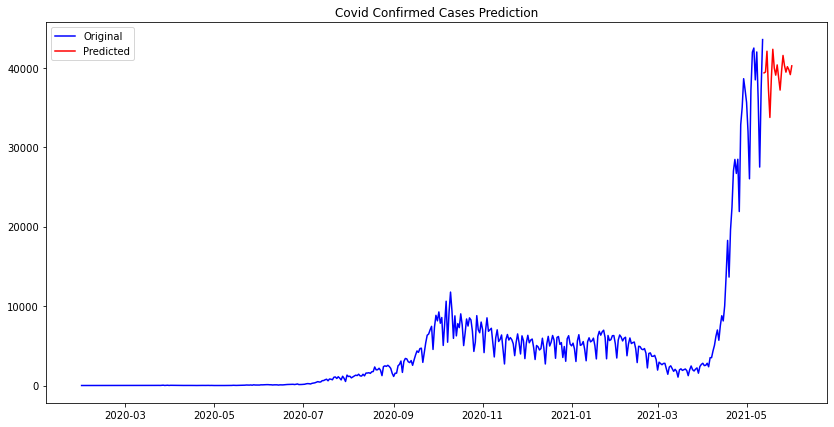

In [39]:
# Prediction Plotting

orgi = plt.plot(df, color='b', label='Original')
predi = plt.plot(forcast_df, color='r', label='Predicted')
plt.legend(loc='best')
plt.title('Covid Confirmed Cases Prediction')
plt.show(block=False)